<div style="position: relative; text-align: center; padding: 30px;">
  <h1><strong>Comparasión de Clasificadores</strong></h1>
  <h3><strong>Walter y Heri</strong></h3>
</div>

**Objetivo**
El objetivo de esta actividad es que cada equipo implemente su propio clasificador bayesiano y lo implemente utilizando la base de datos Heart Disease.

**Instrucciones**

1. Diseña una clase que implemente un clasificador bayesiano ingenuo (sin usar funciones de sklearn):
   - La clase debe construirse recibiendo un único parámetro que indica si la distribución de variables continuas se estimará usando la normal o KDE.

2. Método `.fit()`:
   - Debe recibir como parámetros de entrada:
     - Los datos de entrenamiento `X`, `y`. Donde `X` guarda los valores de las variables y `y` la clase a la que pertenece cada dato.
     - Un diccionario que indique las variables (índices o nombres de columnas) que son "continuas", "enteras" y "categóricas".
   - El método `.fit()` debe calcular:
     - Las probabilidades a priori de cada clase en `Y`, es decir, `P(Y=y_i)`.
     - Las funciones de masa o densidad de probabilidad condicionales `p(X_j = x | Y = y_i)`, para cada `j=1,...,L` y `y_i` para `i=1,...,M`, donde `L` es la dimensión de los datos y `M` el número de clases.
     - Para las variables categóricas debe usar la distribución Bernoulli (o en general distribución categórica).
     - Para las variables enteras calcular la media y estimar el pdf de una distribución Poisson.
     - Para las variables continuas calcular la media y la varianza de los datos para estimar el pdf de la normal, o estimar el KDE, de acuerdo con el parámetro de la clase.

3. Método `.predict()`:
   - Debe recibir un vector `X_pred` que debe tener el mismo número de columnas que `X`.
   - Calcular el clasificador bayesiano ingenuo `\PI_{j=1}^L p(X_j=x_j | Y=y_i)P(Y=y_i)` para cada clase `i=1,...,M` y devolver el valor de `y_i` que lo maximiza.

4. Prueba tu clasificador usando los datos de Heart Disease:
   - Divide tus datos de entrenamiento y prueba de forma aleatoria. Usa proporciones 70-30 u 80-20.
   - Elige entre 5 y 7 variables para tu clasificación. Debe incluir por lo menos una categórica, una entera y una continua.
   - Calcula la exactitud global de tu clasificación.

**Recomendaciones**

- Para la normal se sugiere utilizar el método `.pdf()` de la función `scipy.stats.norm`.
- Para la poisson se sugiere utilizar el método `.pdf()` de la función `scipy.stats.poisson`.
- Para el KDE se sugiere utilizar el método `.evaluate()` de la función `scipy.stats.gaussian_kde`.

Recuerda documentar adecuadamente tu código. Particularmente es importante que el método `fit` y `predict` estén documentados.

In [130]:
import pandas as pd

In [131]:
cleavland = pd.read_csv('05-heart+disease/processed.cleveland.data', header=None, encoding='ISO-8859-1')
hungary = pd.read_csv('05-heart+disease/processed.hungarian.data', header=None, encoding='ISO-8859-1')
switzerland = pd.read_csv('05-heart+disease/processed.switzerland.data', header=None, encoding='ISO-8859-1')
va = pd.read_csv('05-heart+disease/processed.va.data', header=None, encoding='ISO-8859-1')

In [132]:
cleavland

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [133]:
hungary

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


## **Attribute Information:**

### Attribute Names

Only 14 used
   - 1. #3  (age)       
   - 2. #4  (sex)       
   - 3. #9  (cp)        
   - 4. #10 (trestbps)  
   - 5. #12 (chol)      
   - 6. #16 (fbs)       
   - 7. #19 (restecg)   
   - 8. #32 (thalach)   
   - 9. #38 (exang)     
   - 10. #40 (oldpeak)   
   - 11. #41 (slope)     
   - 12. #44 (ca)        
   - 13. #51 (thal)      
   - 14. #58 (num)       (the predicted attribute)

More info in `heart-disease.names`

### **Info of variables**

- **sex**: sex (1 = male; 0 = female)

- **cp**: chest pain type
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic

- **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)

- **chol**: serum cholesterol in mg/dl

- **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- **restecg**: resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- **thalach**: maximum heart rate achieved

- **exang**: exercise induced angina (1 = yes; 0 = no)

- **oldpeak**: ST depression induced by exercise relative to rest

- **slope**: the slope of the peak exercise ST segment
  - Value 1: upsloping
  - Value 2: flat
  - Value 3: downsloping

- **ca**: number of major vessels (0-3) colored by fluoroscopy

- **thal**: 
  - Value 3: normal
  - Value 6: fixed defect
  - Value 7: reversible defect

- **num**: diagnosis of heart disease (angiographic disease status)
  - Value 0: < 50% diameter narrowing
  - Value 1: > 50% diameter narrowing
  - (in any major vessel: attributes 59 through 68 are vessels)
  Hay 

### Attribute asign

In [134]:
attributes = ["Age", "Sex", "Chest Pain Type", "Resting Blood Pressure", "Cholesterol", "Fasting Blood Sugar", "Resting ECG", "Max Heart Rate", "Exercise Induced Angina", "ST Depression", "Slope", "Number of Major Vessels", "Thal", "Diagnosis of Heart Disease"]

cleavland.columns = attributes
hungary.columns = attributes
switzerland.columns = attributes
va.columns = attributes

In [135]:
cleavland

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope,Number of Major Vessels,Thal,Diagnosis of Heart Disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [136]:
hungary

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope,Number of Major Vessels,Thal,Diagnosis of Heart Disease
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [137]:
switzerland

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope,Number of Major Vessels,Thal,Diagnosis of Heart Disease
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,115,0,0,1,92,1,0,2,?,7,1
119,70,1,4,140,0,1,0,157,1,2,2,?,7,3
120,72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
121,73,0,3,160,0,0,1,121,0,0,1,?,3,1


In [138]:
va

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope,Number of Major Vessels,Thal,Diagnosis of Heart Disease
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [139]:
len(cleavland), len(hungary), len(switzerland), len(va)

(303, 294, 123, 200)

## **Solo vamos a trabajar con Cleavland**

In [140]:
cleavland = cleavland.replace(-9.0, None)
cleavland.isnull().sum()

Age                           0
Sex                           0
Chest Pain Type               0
Resting Blood Pressure        0
Cholesterol                   0
Fasting Blood Sugar           0
Resting ECG                   0
Max Heart Rate                0
Exercise Induced Angina       0
ST Depression                 0
Slope                         0
Number of Major Vessels       0
Thal                          0
Diagnosis of Heart Disease    0
dtype: int64

Diseña una clase que implemente un clasificador bayesiano ingenuo (sin usar funciones de sklearn):
   - La clase debe construirse recibiendo un único parámetro que indica si la distribución de variables continuas se estimará usando la normal o KDE.

# **Bayes Naive**

$$p(x|\omega_i) = \prod_{j=1}^{l} p(x_j|\omega_i), \qquad i=1,2,\ldots,M$$

$$\omega_m = \arg \max_{\omega_i} \prod_{j=1}^l p(x_k|\omega_i), \qquad i=1,2,\ldots,M$$

In [141]:
# show the last column
cleavland.iloc[:, -1].value_counts()

Diagnosis of Heart Disease
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

# <span style="background-color: #005500;">No entiendo por que hay 4!</span>

In [142]:
classes =  cleavland.iloc[:, -1].value_counts()
classes

Diagnosis of Heart Disease
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [143]:
N = len(cleavland)
N

303

$P(\omega_i)$

In [144]:
Pwi = classes / N
Pwi

Diagnosis of Heart Disease
0    0.541254
1    0.181518
2    0.118812
3    0.115512
4    0.042904
Name: count, dtype: float64

### $p(x|\omega_i), i = {0, 1, 2, 3, 4}$

In [145]:
# create a new dataframe where the last column is only 0
pxIw0 = cleavland[cleavland.iloc[:, -1] == 0]
pxIw0.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope,Number of Major Vessels,Thal,Diagnosis of Heart Disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [146]:
pxIw1 = cleavland[cleavland.iloc[:, -1] == 1]
pxIw1.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope,Number of Major Vessels,Thal,Diagnosis of Heart Disease
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
16,48.0,1.0,2.0,110.0,229.0,0.0,0.0,168.0,0.0,1.0,3.0,0.0,7.0,1
22,58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1
32,64.0,1.0,3.0,140.0,335.0,0.0,0.0,158.0,0.0,0.0,1.0,0.0,3.0,1


In [147]:
pxIw2 = cleavland[cleavland.iloc[:, -1] == 2]
pxIw2.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope,Number of Major Vessels,Thal,Diagnosis of Heart Disease
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
12,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2
31,60.0,1.0,4.0,117.0,230.0,1.0,0.0,160.0,1.0,1.4,1.0,2.0,7.0,2
52,44.0,1.0,4.0,112.0,290.0,0.0,2.0,153.0,0.0,0.0,1.0,1.0,3.0,2


In [148]:
pxIw3 = cleavland[cleavland.iloc[:, -1] == 3]
pxIw3.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope,Number of Major Vessels,Thal,Diagnosis of Heart Disease
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
23,58.0,1.0,3.0,132.0,224.0,0.0,2.0,173.0,0.0,3.2,1.0,2.0,7.0,3
29,40.0,1.0,4.0,110.0,167.0,0.0,2.0,114.0,1.0,2.0,2.0,0.0,7.0,3
36,43.0,1.0,4.0,120.0,177.0,0.0,2.0,120.0,1.0,2.5,2.0,0.0,7.0,3
38,55.0,1.0,4.0,132.0,353.0,0.0,0.0,132.0,1.0,1.2,2.0,1.0,7.0,3


In [149]:
pxIw4 = cleavland[cleavland.iloc[:, -1] == 4]
pxIw4.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope,Number of Major Vessels,Thal,Diagnosis of Heart Disease
24,60.0,1.0,4.0,130.0,206.0,0.0,2.0,132.0,1.0,2.4,2.0,2.0,7.0,4
40,65.0,0.0,4.0,150.0,225.0,0.0,2.0,114.0,0.0,1.0,2.0,3.0,7.0,4
45,58.0,1.0,3.0,112.0,230.0,0.0,2.0,165.0,0.0,2.5,2.0,1.0,7.0,4
47,50.0,1.0,4.0,150.0,243.0,0.0,2.0,128.0,0.0,2.6,2.0,0.0,7.0,4
121,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,4


C:\Users\herie\AppData\Local\Temp\ipykernel_43916\3827837773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pxIw0["Thal"] = pd.to_numeric(pxIw0["Thal"], errors='coerce')


1

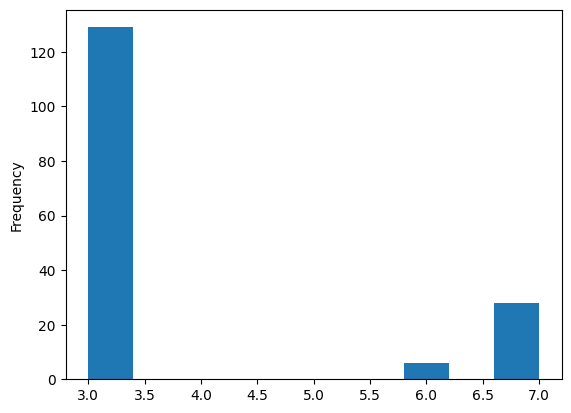

In [150]:
# Convert "Thal" column to numeric, setting errors='coerce' to handle non-numeric values
pxIw0["Thal"] = pd.to_numeric(pxIw0["Thal"], errors='coerce')

# Plot the histogram
pxIw0["Thal"].plot(kind="hist")

# know if there are NaN values
pxIw0["Thal"].isnull().sum()

# <span style="background-color: #005500;">Usamos KDE?</span>

In [151]:
import numpy as np

# replace "?" with NaN
cleavland.replace("?", np.nan, inplace=True) # inplace=True modifies the DataFrame, instead of returning a new one

# filter the DataFrame for missing values
missing = cleavland[cleavland.isnull().any(axis=1)]
missing

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope,Number of Major Vessels,Thal,Diagnosis of Heart Disease
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


# <span style="background-color: #005500;">Que se hace con los ? </span>

#### $p(x|\omega_0)$

Asumimos independencia

$$p(x|\omega_0) = \prod_{j=1}^{13} p(x_j|\omega_0)$$

In [152]:
pxIw0

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope,Number of Major Vessels,Thal,Diagnosis of Heart Disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,56.0,1.0,2.0,130.0,221.0,0.0,2.0,163.0,0.0,0.0,1.0,0.0,7.0,0
289,56.0,1.0,2.0,120.0,240.0,0.0,0.0,169.0,0.0,0.0,3.0,0.0,3.0,0
291,55.0,0.0,2.0,132.0,342.0,0.0,0.0,166.0,0.0,1.2,1.0,0.0,3.0,0
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0


##### $p(x1|\omega_0)$

##### Test Normality

<Axes: ylabel='Frequency'>

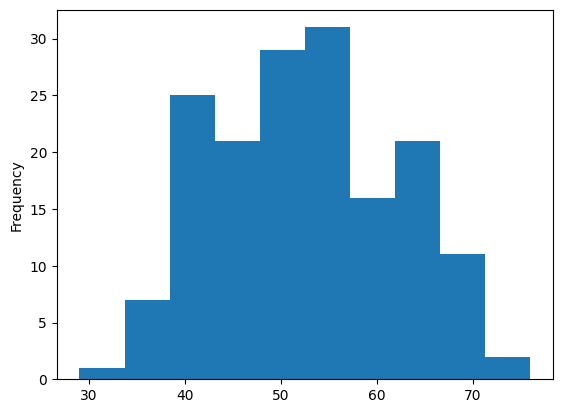

In [153]:
# plot the age distribution for the class 0
pxIw0["Age"].plot(kind="hist")

In [154]:
# we want to knnow if the age is normally distributed, we can use the shapiro-wilk test
from scipy.stats import shapiro

# the null hypothesis is that the data is normally distributed
shapiro(pxIw0["Age"].dropna())

ShapiroResult(statistic=0.9870022881735246, pvalue=0.13204096848016006)

In [155]:
shapiro(pxIw0["Thal"].dropna())

ShapiroResult(statistic=0.5093157676416571, pvalue=3.562570068667871e-21)

In [156]:
shapiro(pxIw0["Cholesterol"].dropna())

ShapiroResult(statistic=0.8973446032535879, pvalue=2.8778215799407816e-09)

<Axes: ylabel='Frequency'>

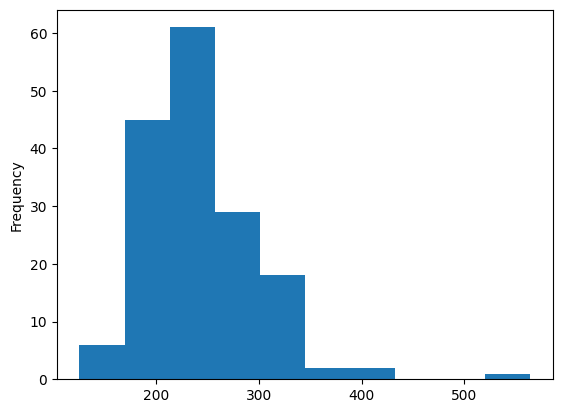

In [157]:
pxIw0["Cholesterol"].plot(kind="hist")

In [158]:
from scipy.stats import shapiro
shapiro(pxIw0["Cholesterol"].dropna())

ShapiroResult(statistic=0.8973446032535879, pvalue=2.8778215799407816e-09)

In [159]:
from scipy.stats import kstest

lambda_hat = pxIw0["Cholesterol"].dropna().mean()
kstest(pxIw0["Cholesterol"].dropna(), "poisson", args=(lambda_hat,))

KstestResult(statistic=0.29395231277224304, pvalue=4.726846799161881e-13, statistic_location=223.0, statistic_sign=1)

no viene de una poisson, ni de una normal

In [160]:
# Para el KDE se sugiere utilizar el método `.evaluate()` de la función `scipy.stats.gaussian_kde`.

from scipy.stats import gaussian_kde

# Drop NaN values from the Cholesterol column
cholesterolnona = pxIw0["Cholesterol"].dropna()

# Create a KDE for the Cholesterol column
px5Iw0 = gaussian_kde(cholesterolnona)

In [161]:
# p(x5=222|w=0)
px5Iw0.evaluate(222)

array([0.00866861])

# <span style="background-color: #005500;">Como funciona KDE? le podemos calcular a las binarias tmb? kde de una binaria es igual a una bernoulli?</span>

In [163]:
pxIw0.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG,Max Heart Rate,Exercise Induced Angina,ST Depression,Slope,Number of Major Vessels,Thal,Diagnosis of Heart Disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


# tire todo

In [ ]:
cleavland.replace("?", np.nan, inplace=True)
cleavland.dropna(inplace=True)
cleavland = cleavland.apply(pd.to_numeric)

In [168]:
pxIw0 = cleavland[cleavland.iloc[:, -1] == 0]
pxIw1 = cleavland[cleavland.iloc[:, -1] == 1]
pxIw2 = cleavland[cleavland.iloc[:, -1] == 2]
pxIw3 = cleavland[cleavland.iloc[:, -1] == 3]

In [169]:
px0Iw0 = gaussian_kde(pxIw0.iloc[:, 0])
px1Iw0 = gaussian_kde(pxIw0.iloc[:, 1])
px2Iw0 = gaussian_kde(pxIw0.iloc[:, 2])
px3Iw0 = gaussian_kde(pxIw0.iloc[:, 3])
px4Iw0 = gaussian_kde(pxIw0.iloc[:, 4])
px5Iw0 = gaussian_kde(pxIw0.iloc[:, 5])
px6Iw0 = gaussian_kde(pxIw0.iloc[:, 6])
px7Iw0 = gaussian_kde(pxIw0.iloc[:, 7])
px8Iw0 = gaussian_kde(pxIw0.iloc[:, 8])
px9Iw0 = gaussian_kde(pxIw0.iloc[:, 9])
px10Iw0 = gaussian_kde(pxIw0.iloc[:, 10])
px11Iw0 = gaussian_kde(pxIw0.iloc[:, 11])
px12Iw0 = gaussian_kde(pxIw0.iloc[:, 12])

In [171]:
px1Iw0.evaluate(0)

array([0.98018245])

In [172]:
px1Iw0.evaluate(1)

array([1.22867929])

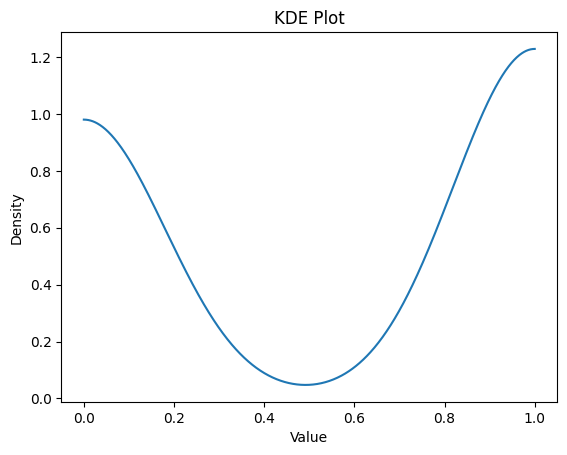

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of values for plotting the KDE
x = np.linspace(min(pxIw0.iloc[:, 1]), max(pxIw0.iloc[:, 1]), 1000)

# Plot the KDE
plt.plot(x, px1Iw0.evaluate(x))
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE Plot')
plt.show()

## **Método `.fit()`**

Método `.fit()`:
- Debe recibir como parámetros de entrada:
  - Los datos de entrenamiento `X`, `y`. Donde `X` guarda los valores de las variables y `y` la clase a la que pertenece cada dato.
  - Un diccionario que indique las variables (índices o nombres de columnas) que son "continuas", "enteras" y "categóricas".
- El método `.fit()` debe calcular:
  - Las probabilidades a priori de cada clase en `Y`, es decir, `P(Y=y_i)`.
  - Las funciones de masa o densidad de probabilidad condicionales `p(X_j = x | Y = y_i)`, para cada `j=1,...,L` y `y_i` para `i=1,...,M`, donde `L` es la dimensión de los datos y `M` el número de clases.
  - Para las variables categóricas debe usar la distribución Bernoulli (o en general distribución categórica).
  - Para las variables enteras calcular la media y estimar el pdf de una distribución Poisson.
  - Para las variables continuas calcular la media y la varianza de los datos para estimar el pdf de la normal, o estimar el KDE, de acuerdo con el parámetro de la clase.


## **Método `.predict()`**

Método `.predict()`:
- Debe recibir un vector `X_pred` que debe tener el mismo número de columnas que `X`.
- Calcular el clasificador bayesiano ingenuo `\PI_{j=1}^L p(X_j=x_j | Y=y_i)P(Y=y_i)` para cada clase `i=1,...,M` y devolver el valor de `y_i` que lo maximiza.

## **Prueba**

Prueba tu clasificador usando los datos de Heart Disease:
- Divide tus datos de entrenamiento y prueba de forma aleatoria. Usa proporciones 70-30 u 80-20.
- Elige entre 5 y 7 variables para tu clasificación. Debe incluir por lo menos una categórica, una entera y una continua.
- Calcula la exactitud global de tu clasificación.

**Recomendaciones**

- Para la normal se sugiere utilizar el método `.pdf()` de la función `scipy.stats.norm`.
- Para la poisson se sugiere utilizar el método `.pdf()` de la función `scipy.stats.poisson`.
- Para el KDE se sugiere utilizar el método `.evaluate()` de la función `scipy.stats.gaussian_kde`.

Recuerda documentar adecuadamente tu código. Particularmente es importante que el método `fit` y `predict` estén documentados.